In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('./datasets/data.csv', encoding='CP949')
target = pd.read_csv('./datasets/OECD신용등급.csv', encoding='CP949')
target.drop('신용등급_1', axis=1, inplace=True)

In [3]:
data.columns

Index(['국가별', '시점', '인당_국민총소득', 'GDP_성장률', '디플레이터', '수출', '수입', '무역의존도_수출',
       '무역의존도_수입', '외환보유액', '부채비율', '국민부담률', '평균근로자세금', '경제활동참가율 (%)', '고용률',
       '실업률'],
      dtype='object')

In [4]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='left')
datasets.columns = ['국가별', '시점', '인당_국민총소득', 'GDP_성장률', '디플레이터', '수출', '수입',
       '무역의존도_수출', '무역의존도_수입', '외환보유액', '부채비율', '국민부담률', '평균근로자세금', '경제활동참가율',
       '고용률', '실업률', '신용등급']
datasets['수입'] = datasets['수입'].astype(float)
datasets['무역의존도_수입'] = datasets['무역의존도_수입'].astype(float)
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        114 non-null    int64  
 1   인당_국민총소득  114 non-null    float64
 2   GDP_성장률   114 non-null    float64
 3   디플레이터     114 non-null    float64
 4   수출        114 non-null    float64
 5   수입        114 non-null    float64
 6   무역의존도_수출  114 non-null    float64
 7   무역의존도_수입  114 non-null    float64
 8   외환보유액     114 non-null    int64  
 9   부채비율      114 non-null    float64
 10  국민부담률     114 non-null    float64
 11  평균근로자세금   114 non-null    float64
 12  경제활동참가율   114 non-null    float64
 13  고용률       114 non-null    float64
 14  실업률       114 non-null    float64
 15  신용등급      114 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 14.4 KB


In [5]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,인당_국민총소득,GDP_성장률,디플레이터,수출,수입,무역의존도_수출,무역의존도_수입,외환보유액,부채비율,국민부담률,평균근로자세금,경제활동참가율,고용률,실업률,신용등급
count,114.000000,114.000000,114.000000,114.000000,1.140000e+02,1.140000e+02,114.000000,114.000000,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,1.710526,32750.570175,3.348246,95.848246,2.238427e+05,2.247745e+05,36.308246,36.257544,8.296503e+04,72.816588,34.342982,38.482456,60.285965,66.111404,8.215789,17.011752
std,1.053638,19334.244737,3.164914,13.415816,2.823353e+05,3.293057e+05,19.655216,19.602815,1.836847e+05,41.206568,7.007278,8.778587,5.906092,7.026458,4.194235,3.364981
min,0.000000,3911.000000,-5.500000,58.200000,3.092000e+03,3.919000e+03,8.240000,2.240000,2.790000e+02,6.788000,11.400000,14.700000,48.100000,46.300000,2.600000,3.900000
25%,1.000000,16402.250000,1.825000,88.625000,4.964800e+04,4.503625e+04,20.455000,22.787500,9.670250e+03,45.590500,30.500000,32.675000,57.325000,61.025000,5.100000,14.500000
50%,2.000000,31591.500000,2.950000,100.000000,1.204630e+05,8.910150e+04,31.785000,29.410000,3.217000e+04,62.237500,33.100000,38.800000,59.750000,66.200000,7.350000,18.000000
75%,3.000000,43878.500000,4.200000,103.900000,3.253045e+05,3.147872e+05,51.052500,50.712500,7.330925e+04,97.977500,39.350000,43.925000,63.175000,71.725000,9.825000,20.000000
max,3.000000,88706.000000,25.200000,143.100000,1.503400e+06,2.248800e+06,86.700000,84.740000,1.233153e+06,234.073000,48.000000,57.100000,81.400000,83.800000,24.900000,20.000000


In [6]:
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:15], datasets.iloc[:,15], test_size=0.2, random_state=42)

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

mse : 4.2255521778631255 
rmse : 2.055614793161191 
r2 : 0.5068921400515334 
coef : [-1.73137115e+00  5.46419904e-05  5.65498723e-02  7.95359843e-02
  7.43637178e-07  3.36262495e-06  1.28427607e-02 -1.41885399e-02
 -9.95994248e-07 -1.88655698e-02  1.32229287e-01 -6.86548399e-02
 -2.32938127e-01  3.43035368e-01  1.07834078e-02] 
intercept : 0.3141255840694477


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


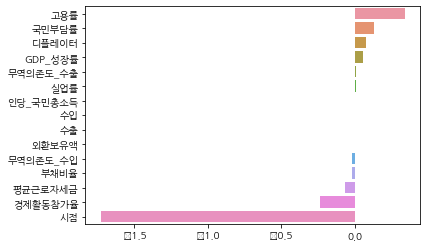

In [8]:
coef_ = pd.Series(lr.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)


In [9]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)


lr = LinearRegression()
lr.fit(x_train_ss, y_train)
pred = lr.predict(x_test_ss)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

mse : 6.0467800649426575 
rmse : 2.459020143256793 
r2 : 0.29436091381770946 
coef : [-1.787842    1.02031202  0.19589787  1.08890687  0.17353835  0.90757011
  0.24389648 -0.26787695 -0.19749353 -0.79825627  0.96554988 -0.59980075
 -1.45810551  2.50960578  0.04483043] 
intercept : 16.846589917912087


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


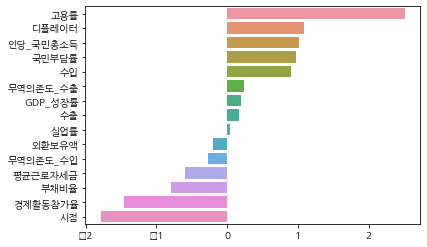

In [10]:
coef_ = pd.Series(lr.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)


In [11]:
datasets.drop('시점', inplace=True, axis=1)
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:14], datasets.iloc[:,14], test_size=0.2, random_state=42)

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

mse : 5.610327053961492 
rmse : 2.3686128966045703 
r2 : 0.34529352597203944 
coef : [ 4.19029859e-05  4.70468523e-02 -2.09189728e-02 -2.07854917e-06
  5.91983089e-06  4.48723814e-02 -5.79472572e-02 -1.24227275e-07
 -2.61851826e-02  1.46751963e-01 -3.25629307e-02 -2.09323179e-01
  2.81656390e-01 -8.53858537e-02] 
intercept : 9.852133080987016


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


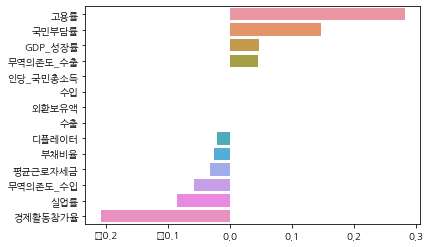

In [13]:
coef_ = pd.Series(lr.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)


In [14]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)


lr = LinearRegression()
lr.fit(x_train_ss, y_train)
pred = lr.predict(x_test_ss)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

mse : 6.84156489087862 
rmse : 2.6156385245057505 
r2 : 0.2016121727916338 
coef : [ 0.78244076  0.16297788 -0.28639632 -0.48505912  1.59775819  0.85217003
 -1.09403325 -0.02463276 -1.10797005  1.07159573 -0.28448497 -1.31028477
  2.06056451 -0.35497909] 
intercept : 16.846589917912087


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


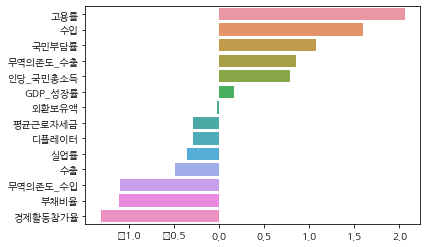

In [15]:
coef_ = pd.Series(lr.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)